# **Cross-Validation & Nearest Neighbor Classifier**

## Mobile Phone Price Estimation

**Background**

You are a data scientist at **DeepCore AI**, a technology company focused on seamlessly and efficiently integrating artificial intelligence into mobile phones. DeepCore AI is a relatively new player in the industry, competing against well-established brands like Apple, Samsung, and Huawei.

One of the major challenges in this competitive market is pricing DeepCore AI’s mobile phones correctly. Overpricing could lead to low sales as customers may prefer competitors' devices, while underpricing could result in financial losses for the company. Therefore, accurately estimating the price of a mobile phone based on its technical specifications is a critical task.

To achieve this, you will collect and analyze data from various companies selling mobile phones and identify relationships between device features and their corresponding market prices. Some of the key features influencing mobile phone pricing include:

- RAM (Random Access Memory)
- Internal Storage Capacity
- Processor Clock Speed
- Number of CPU Cores

**Objective**

Your goal is to develop a predictive model that estimates mobile phone prices based on these hardware features. To accomplish this, you will implement the k-Nearest Neighbors (k-NN) algorithm and evaluate its performance using cross-validation techniques. This approach will help ensure that the model generalizes well to unseen data, preventing overfitting and improving price estimation accuracy.


**Cross-Validation**

We learned in lecture that K-fold cross validation is a resampling technique used to evaluate the performance of machine learning models. The process of k-fold cross validation is as follows:

* splitting the dataset into k folds,
* then, training the model on k-1 folds,
* finally, testing it on the remaining fold.


This process is repeated k times, with each fold being used as the test set once. We compute the average performance metric across all K iterations to obtain a more reliable estimate of the model's generalization ability. The results are typically averaged to obtain ***a more robust estimate of your model's performance.***

#### **The Dataset**

In this assignment, you will be using the Mobile Price Prediction dataset, which contains 21 features about phones from different companies. The objective is to use the k-Nearest Neighbors (k-NN) algorithm to classify the phone samples depending on the target variable **price_range**. There are four price ranges represented by 0,1,2, and 3. So, this a classification task.

Additionally, you'll employ cross-validation to evaluate and optimize the performance of your k-NN classifier.

To simulate this task, you will use the Mobile Price Classification dataset from Kaggle, which contains mobile phone specifications and their corresponding price categories. The dataset is provided to you as a CSV file but you can review the page linked below to learn more about its attributes and other details.

https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification/data?select=train.csv

By the end of this project, you will have gained a deeper understanding of both the k-NN algorithm and the concept of cross-validation, which are fundamental techniques in machine learning.


### **Load and Explore the Dataset**

Load the Mobile Phone Classification dataset through `scikit-learn` and visually explore the relationships between different chemical measurements.

In [ ]:
# Load the Mobile Phone Classification dataset into a dataframe and import the needed library(-ies)
import pandas as pd
df = pd.read_csv('files/mobile_price_train.csv')

# Display the shape of the dataset
print(f'Shape: {df.shape}\n')

# Display the first 5 rows
df.head()

Shape: (2000, 21)



,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### **The Pairplot**

The `sns.pairplot()` function below provides a grid of scatter plots, where each plot represents the relationship between two features of the dataset. The plots along the diagonal represent histograms of individual features. These histograms provide insights into the distribution of each feature. By examining the histograms, you can gauge the distribution (e.g., normal, skewed) of each feature and observe potential outliers or irregularities.

**Off-Diagonal Plots:**

Each scatter plot in the off-diagonal part represents the relationship between two features. The x-axis represents one feature, and the y-axis represents another feature. Each point in the scatter plot corresponds to a sample in the dataset. The color of the points is determined by the hue parameter. In this case, it's the price_range, so each color represents a different price range.

**Interpreting Scatter Pairplots:**

A scatter plot can show whether two features have a linear relationship (positive or negative correlation), a non-linear relationship, or no discernible relationship. If all the points tend to group by color (representing the price range in this context), it suggests that those two features can help discriminate between price ranges. If the points of different colors are mixed without distinct grouping, it implies that those two features might not be as useful for distinguishing between the price ranges.

**Overall Purpose of pairplot:**

The pairplot is a quick way to visualize relationships between all pairs of features in the dataset. It can help identify patterns, correlations, and feature relationships that might be important for classification or other tasks.
For a classification task, like with the phone price ranges, the goal is to find features that help separate the data into distinct, non-overlapping groups corresponding to the classes (price ranges, in this case).

To effectively use the pairplot, look for scatter plots where data points of different colors (price ranges) are well-separated. These feature pairs might be particularly useful for classification. Observe the distribution of individual features. Features with distinct distributions for different classes can be valuable for classification. If two features exhibit a strong correlation (linear or non-linear), they might provide redundant information, so you might not need to use both in your model.



**NOTE**

Since the dataset contains a 20 × 20 matrix of feature relationships, generating the Seaborn pairplot may take some time. In Google Colab, this process can take approximately **3 minutes** due to the large number of pairwise comparisons being visualized.

In [8]:
# Visualize the relationships between features
import seaborn as sns
sns.pairplot(df, hue='price_range')

Output hidden; open in https://colab.research.google.com to view.

### **Task 1: Interpret the Pairplot**


In the `sns.pairplot()` visualization with the `hue='price_range'` argument above, the color of each data point in the scatter plots represents its price range. So, while each scatter plot visualizes the relationship between two features, the color-coding adds a third dimension that represents the price range. This means that every scatter plot actually shows the relationship between two features as well as how the price range is distributed with respect to those two features.


**Question:**

Based on the pair plots generated, can you identify one or two features that seem to have a strong relationship with the price range of the mobile phone? Describe how the different price ranges are distributed with respect to these features. Additionally, are there any features that don't seem to provide clear distinctions between the price ranges?

**Hints:**

1. Look for plots where data points of different colors (representing different price ranges) are well-separated. This suggests that those features might be particularly useful for distinguishing between the price ranges.

2. On the contrary, plots where data points of different colors are mixed without clear boundaries might indicate that those features are not as effective in distinguishing between price ranges.

### **TODO: Write your answer to Task 1 here:**

The distribution plot (KDE plot?) of "ram" has four distinct peaks for each price class, indicating that ram has a very strong relationship with price range. Thus, it follows that ram also interacts well with other features, such as px_width and four_g, whose scatterplots show some of the clearest class distinctions.

The feature battery_power also shows decent class distinction, although not as clear as ram. While the lowest and highest classes (lowest price range and highest price range) are easily distinguished in the distribution plot, the two middle classes are harder to distinguish. Thus, battery_power may not be the best feature on its own.

In fact, most other features in the dataset do not seem to have a clear relationship with price range on their own.


## **Task 2: Exploring the dataset more closely**

**2.0 Types of features**

Analyze the basic characteristics of your dataset by:

- Displaying the data types of all features in the dataset
- Using the describe() function to get comprehensive statistical information

In [9]:
#Write your code here
df.dtypes

,0
battery_power,int64
blue,int64
clock_speed,float64
dual_sim,int64
fc,int64
four_g,int64
int_memory,int64
m_dep,float64
mobile_wt,int64
n_cores,int64


In [10]:
#Write your code here
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


**2.1 Feature comparison**

- Create a jointplot showing the relationship between `ram` and `price_range`
- Create another jointplot showing the relationship between internal memory (`int_memory`) and `price_range`
For this question you will use Seaborn's `jointplot` method. Review the documentation to learn how to use its parameters here: https://seaborn.pydata.org/generated/seaborn.jointplot.html . Please note to answer this question, you only need a few of the possible parameters for joint plot: `x`, `y`, `data`, `color`, `kind`

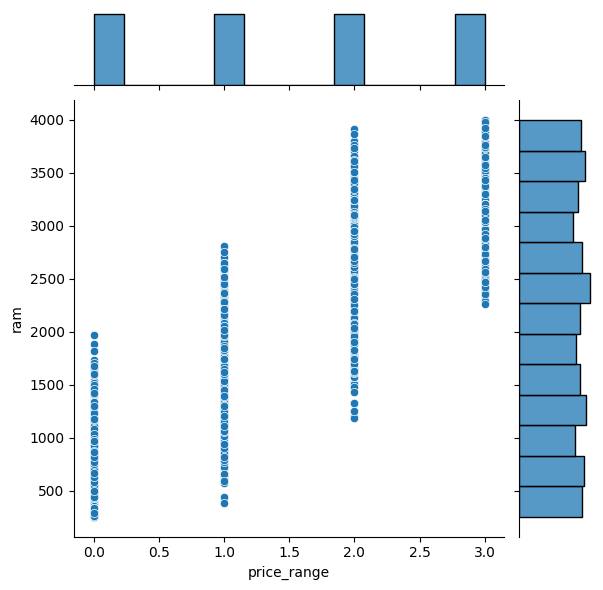

In [15]:
# Write your code here
sns.jointplot(data=df, y='ram', x='price_range')

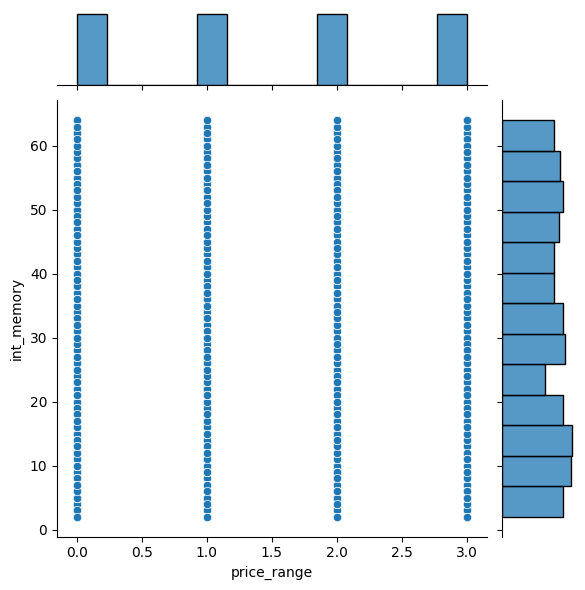

In [16]:
# Write your code here
sns.jointplot(data=df, y='int_memory', x='price_range', kind='scatter')

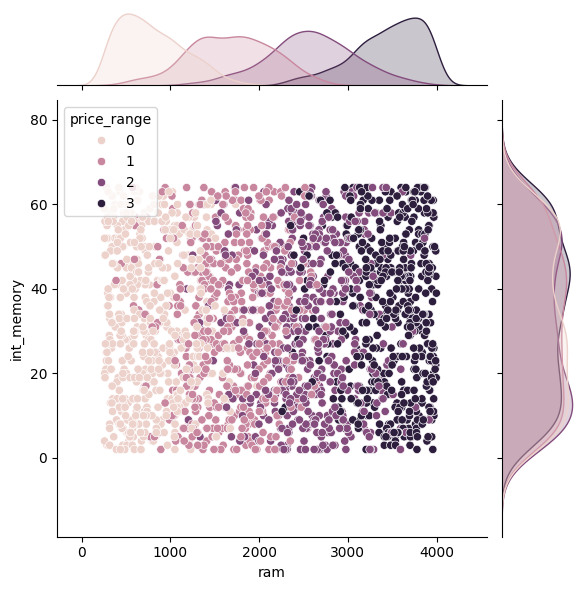

In [17]:
# Ram vs. Int Memory by price range
sns.jointplot(data=df, x='ram', y='int_memory', hue='price_range')

**2.2 RAM vs Price range**

- Create a simple Linear regression that takes `RAM` as the independent variable and `price_range` as the dependent variable.

- Plott the original data points as a scatter plot
- Add the regression line to show the predicted values
- Does price range increase or decrease with RAM?

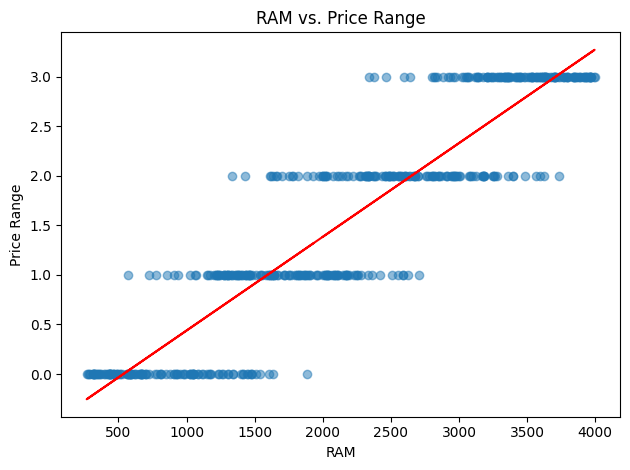

In [25]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#Create and train the model here
X = np.array(df['ram']).reshape(-1,1)
y = np.array(df['price_range']).reshape(-1,1)
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y)
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

# Create the visualization
plt.figure()
plt.scatter(X_test, y_test, alpha=0.5)
plt.plot(X_test, y_pred, color='red')
plt.xlabel('RAM')
plt.ylabel('Price Range')
plt.title('RAM vs. Price Range')
plt.tight_layout()
plt.show()

### **TODO: Write your answer to 2.2 here:**

Answer: Price range increases as RAM increases, as shown by the positive regression line.

## **Task 3: Implement k-NN Algorithm**

Given the chemical measurements of mobile samples in the Mobile Phone Classification dataset, implement the k-NN algorithm in a python function named `predict_phone_range`, using `scikit-learn` KNeighborsClassifier() classifier to predict the "price_range" of a mobile phone sample.  The function splits the dataset into a training set (80%) and a test set (20%) using a fixed random seed for reproducibility. The accuracy is computed on the test set. Your function should have two paramerers:

- data
- k

Start with *k=3*.
Your function should not return a value but it should print the accuracy score of the k-NN classifier of the given k value.

Your function should include a complete docstring.

In [27]:
# Set X to be all the features except the dependent variable
X = df.drop(columns=['price_range'])
# Set y to be the dependent variable
y = df['price_range']

In [31]:
X.shape
y.shape

(2000,)

In [33]:
# TODO: Write your code here
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def predict_phone_price_range(X, y, k=3):
  """
    Predicts the phone price range using the k-NN algorithm and evaluates its performance.

    Parameters:
    - X: The independent variables of the dataset.
    - y: The dependent variables of the dataset, the price range of the phone samples.
    - k (int, optional): The number of nearest neighbors to be considered for prediction. Default is 3.

    Returns:
    None. The function prints the accuracy of the k-NN classifier for the given value of k.
  """
  # Split the data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Initialize model
  knn = KNeighborsClassifier()

  # Fit and predict
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)

  # Calculate and print accuracy
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy for k={k}: {accuracy:.4f}")

# Call your function on the Mobile Phone Classification dataset, with k=3
predict_phone_price_range(X, y)

Accuracy for k=3: 0.9425


## **Task 3: Cross-Validation**

Now, you will evaluate different values of k on the Mobile Phone Classification dataset using cross validation.

1) First, read the official documentation for [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) and [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) from `scikit-learn` library.

2) Then, given the chemical measurements of phone samples, implement a new python function named `evaluate_knn_with_cross_validation` that takes two parameters:

* `X`: this is the independent variables that you will later assign
* `y`: this is the dependent variables that you will later assign
* `k_values=[]` : this is a python list for the values of k that you will later assign

This function will implement k-NN classifier(s) using `scikit-learn` `KNeighborsClassifier` and evaluate its performance using 5-fold cross-validation. Evaluate the performance for different values of k.

3) Specifically, test for `k=1,3,5,7`.

4) Your function does not need to return anything, but it needs to print the average accuracy of the k-NN classifier for each value of k using 5-fold cross-validation.

5) Your function needs to have a complete docstring.


In [35]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

def evaluate_knn_with_cross_validation(X, y, k_values):
  """
    Evaluates the performance of the k-NN algorithm on the Mobile Phone dataset using 5-fold cross-validation for a list of k values.

    Parameters:
    - X: The independent variables of the dataset.
    - y: The dependent variables of the dataset, the price range of the phone samples.
    - k_values (list of int): A list of integer values for k, representing the number of nearest neighbors to consider for prediction.

    Returns:
    None. The function prints the average accuracy of the k-NN classifier for each value of k using 5-fold cross-validation.
  """
  # Using KFold(), Implement 5-fold cross-validation, use n_splits=5, shuffle=True, and a random_state value
  kf = KFold(n_splits=5, shuffle=True, random_state=42)

  # Evaluate performance for different k values in a for loop
  for k in k_values:

      # Initialize model
      knn = KNeighborsClassifier(n_neighbors=k)

      # Get cross validations scores
      cv_scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')

      # Calculate average accuracy
      average_score = cv_scores.mean()
      print(f"Average accuracy for k={k}: {average_score:.4f}")

# Call your function on the Mobile Phone dataset with specific values for k
k_values =[1, 3, 5, 7]
evaluate_knn_with_cross_validation(X, y, k_values)

Average accuracy for k=1: 0.9000
Average accuracy for k=3: 0.9215
Average accuracy for k=5: 0.9235
Average accuracy for k=7: 0.9290


## **Task 4: Optimize the Value of k**

In Task 3, the cross-validation has been tested on a given list. In thistask we will apply it in a given range to determine the optimal value of k for the k-NN algorithm that provides the highest classification accuracy.

Implement the `optimize_k_for_knn()` Function

You are tasked with implementing a function that evaluates the performance of the k-NN algorithm for a range of k values using 5-fold cross-validation on a given dataset. The function should determine which k value gives the highest average accuracy.

Follow these steps to complete the implementation:

1) Function Signature: Your function should accept two parameters:
* `data` (the dataset)
* `k_range` (a range of k values).
The default value for k_range should be from 1 to 16.

2) Docstring: Begin your function with a docstring that explains its purpose, its parameters, and its return values.

3) Cross-Validation Setup: Use the KFold() method from `scikit-learn` to set up 5-fold cross-validation. Ensure the data is shuffled and use a fixed random_state for reproducibility. Create a loop that iterates over each value of k in `k_range`.For each k value, instantiate a k-NN classifier and perform cross-validation to obtain a list of accuracy scores. Compute the average accuracy for the current k and store it in a list. Some inline comments are also provided to guide you.

4) Determine Optimal k: After evaluating all k values, determine the k value that resulted in the highest average accuracy.

5) Your function should return two values: The optimal k value and the list of average accuracies for each k value. To test your function, call it on the provided Mobile Phone Classification dataset and examine the optimal k value and the first five accuracy values.

In [40]:
import matplotlib.pyplot as plt

def optimize_k_for_knn(X, y, k_range=range(1, 16)):
    """
    Evaluates the performance of the k-NN algorithm for a range of k values using 5-fold cross-validation.

    Parameters:
    - X: The independent variables of the dataset.
    - y: The dependent variables of the dataset, the price range of the phone samples.
    - k_range: A range of k values to evaluate. Default is 1 to 15.

    Returns:
    - optimal_k: The k value that gives the highest average accuracy.
    - accuracies: A list containing average accuracies for each k value.
    """
    # Using KFold(), Implement 5-fold cross-validation, use n_splits=5, shuffle=True, and a random_state value
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Create a list to hold the list of accuracies
    accuracies = []

    for k in k_range:
        # instantiate a k-NN classifier
        knn = KNeighborsClassifier(n_neighbors=k)

        # store the cross validation scores
        cv_scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')

        # append the mean of the scores to the list of accuracies
        accuracies.append(cv_scores.mean())

    # optimal_k is maximum of the accuracies
    optimal_k_index = accuracies.index(max(accuracies))
    optimal_k = k_range[optimal_k_index]

    # return the optimal_k and accuracies
    return optimal_k, accuracies

# Call the function
optimal_k_value, accuracy_values = optimize_k_for_knn(X, y)
optimal_k_value, accuracy_values[:5]  # Displaying the optimal k value and the first 5 accuracy values for brevity


(13, [0.9, 0.8965, 0.9215, 0.917, 0.9235000000000001])

## **Task 5: Visualize Cross Validation**

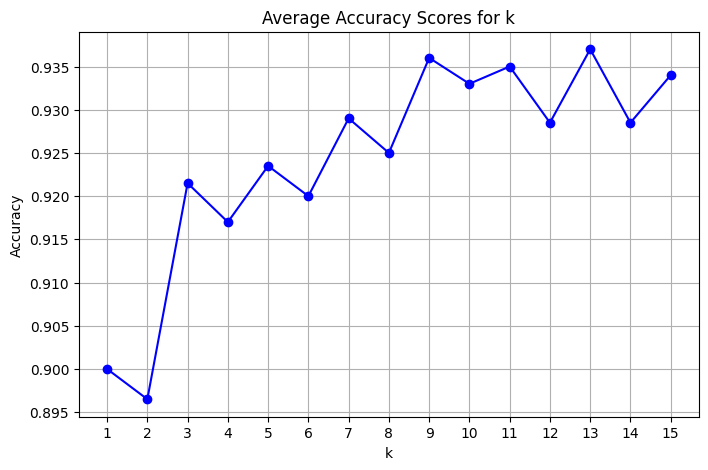

In [41]:
import matplotlib.pyplot as plt

def plot_knn_accuracy(k_range, accuracies):
    """
    Plots the average accuracies for different k values of k-NN.

    Parameters:
    - k_range: The range of k values.
    - accuracies: List of average accuracies corresponding to each k.
    """
    #Write your code here
    plt.figure(figsize=(8, 5))
    plt.plot(k_range, accuracies, marker='o', linestyle='-', color='b')
    plt.title('Average Accuracy Scores for k')
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.xticks(k_range)
    plt.grid(True)
    plt.show()

optimal_k_value, accuracy_values = optimize_k_for_knn(X, y)

# Now, you can visualize the results:
plot_knn_accuracy(range(1,  16), accuracy_values)
